In [125]:
import pandas as pd
import numpy as np
from scipy import stats

In [ ]:
# https://nextgenstats.nfl.com/stats/passing/2016/all

In [15]:
stats_2016 = pd.read_clipboard(header=None)

In [45]:
stats_2017 = pd.read_clipboard(header = None)

In [53]:
stats_2018 = pd.read_clipboard(header = None)

In [58]:
stats_2019 = pd.read_clipboard(header = None)

In [9]:
columns = ['team',
          'time to throw',
          'average completed air yards',
          'average intended air yards',
          'average air yards differential',
          'aggressiveness',
          'longest completed air distance',
          'air yards to the sticks',
          'attempts',
          'yards',
          'tds',
          'ints',
          'passer rating',
          'completion percentage',
          'expected completion percentage',
          'completion percentage delta']

In [44]:
qb_stats_2016 = [stats_2016.values[x*16:x*16+16] for x in range(int(len(stats_2016)/16))]

qb_stats_2017 = [stats_2017.values[x*16:x*16+16] for x in range(int(len(stats_2017)/16))]

qb_stats_2018 = [stats_2018.values[x*16:x*16+16] for x in range(int(len(stats_2018)/16))]

qb_stats_2019 = [stats_2019.values[x*16:x*16+16] for x in range(int(len(stats_2019)/16))]

In [51]:
names_2016 = """Blaine Gabbert
Josh McCown
Matt Barkley
Brian Hoyer
Aaron Rodgers
Drew Brees
Philip Rivers
Matt Ryan
Marcus Mariota
Derek Carr
Bryce Petty
Robert Griffin III
Tyrod Taylor
Colin Kaepernick
Andrew Luck
Joe Flacco
Ben Roethlisberger
Carson Wentz
Matthew Stafford
Jared Goff
Carson Palmer
Case Keenum
Ryan Fitzpatrick
Jameis Winston
Brock Osweiler
Ryan Tannehill
Cam Newton
Tom Brady
Trevor Siemian
Blake Bortles
Kirk Cousins
Jay Cutler
Russell Wilson
Sam Bradford
Alex Smith
Andy Dalton
Dak Prescott
Cody Kessler
Eli Manning"""

names_2017 = """Brian Hoyer
Jay Cutler
Blaine Gabbert
Kirk Cousins
DeShone Kizer
Philip Rivers
Carson Wentz
Carson Palmer
Alex Smith
Andy Dalton
Ryan Fitzpatrick
Case Keenum
Jacoby Brissett
Jared Goff
Trevor Siemian
Blake Bortles
C.J. Beathard
Derek Carr
Joe Flacco
Brett Hundley
Dak Prescott
Jimmy Garoppolo
Tyrod Taylor
Josh McCown
Drew Brees
Tom Brady
Aaron Rodgers
Brock Osweiler
Drew Stanton
Russell Wilson
Eli Manning
Jameis Winston
Matt Ryan
Mitchell Trubisky
Ben Roethlisberger
Matthew Stafford
Marcus Mariota
Mike Glennon
Cam Newton
Tom Savage
Deshaun Watson"""

names_2018 = """Eli Manning
Ryan Fitzpatrick
Andrew Luck
Drew Brees
Jameis Winston
Deshaun Watson
Case Keenum
Aaron Rodgers
Brock Osweiler
Kirk Cousins
Blake Bortles
Alex Smith
Cody Kessler
Jared Goff
Sam Darnold
Philip Rivers
Carson Wentz
Marcus Mariota
Tom Brady
Derek Carr
C.J. Beathard
Matthew Stafford
Andy Dalton
Ben Roethlisberger
Cam Newton
Mitchell Trubisky
Lamar Jackson
Ryan Tannehill
Dak Prescott
Josh Allen
Josh Rosen
Russell Wilson
Nick Mullens
Patrick Mahomes
Joe Flacco
Nick Foles
Baker Mayfield
Matt Ryan
Jeff Driskel"""

names_2019 = """Matt Ryan
Carson Wentz
Dwayne Haskins
Derek Carr
Sam Darnold
Philip Rivers
Aaron Rodgers
Jameis Winston
Case Keenum
Mason Rudolph
Jimmy Garoppolo
Andy Dalton
Mitchell Trubisky
Tom Brady
Daniel Jones
Matthew Stafford
Eli Manning
Kyle Allen
Deshaun Watson
Drew Lock
Kirk Cousins
Baker Mayfield
Jacoby Brissett
Teddy Bridgewater
Ryan Tannehill
Kyler Murray
Jared Goff
Dak Prescott
Russell Wilson
Marcus Mariota
David Blough
Josh Allen
Devlin Hodges
Joe Flacco
Ryan Fitzpatrick
Drew Brees
Lamar Jackson
Patrick Mahomes
Gardner Minshew"""

In [65]:
all_stats = qb_stats_2016 + qb_stats_2017 + qb_stats_2018 + qb_stats_2019

In [74]:
df = pd.DataFrame(list(map(np.ravel, all_stats)), columns=columns)

In [76]:
all_names = "\n".join([names_2016, names_2017, names_2018, names_2019]).split("\n")

In [78]:
df['name'] = all_names

In [87]:
all_years = []

for x in qb_stats_2016:
    all_years.append("2016")
    
for x in qb_stats_2017:
    all_years.append("2017")
    
for x in qb_stats_2018:
    all_years.append("2018")
    
for x in qb_stats_2019:
    all_years.append("2019")

In [90]:
df['season'] = all_years

In [177]:
for c in df.columns:
    try:
        df[c] = df[c].astype(float)
    except ValueError:
        pass

In [ ]:
def standardize(n):

    return (n - df['completion percentage delta'].mean()) / df['completion percentage delta'].std()

df['standardized delta'] = df['completion percentage delta'].apply(standardize)

In [176]:
df.to_csv("stats_2016-2019.csv", index=None)

In [96]:
df['completion percentage delta'] = df['completion percentage delta'].astype(float)

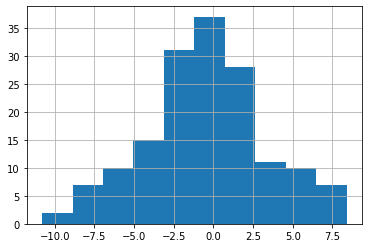

In [102]:
df['completion percentage delta'].hist()

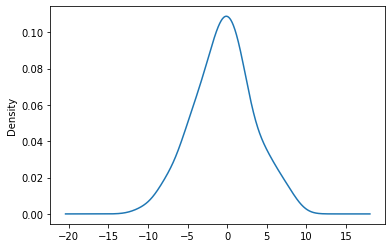

In [103]:
df['completion percentage delta'].plot.kde()

In [107]:
df['completion percentage'] = df['completion percentage'].astype(float)

In [108]:
df['completion percentage'].mean()

63.15316455696198

In [109]:
df['expected completion percentage'] = df['expected completion percentage'].astype(float)

In [110]:
df['expected completion percentage'].mean()

63.659493670886036

In [111]:
df.columns

Index(['team', 'time to throw', 'average completed air yards',
       'average intended air yards', 'average air yards differential',
       'aggressiveness', 'longest completed air distance',
       'air yards to the sticks', 'attempts', 'yards', 'tds', 'ints',
       'passer rating', 'completion percentage',
       'expected completion percentage', 'completion percentage delta', 'name',
       'season'],
      dtype='object')

In [113]:
for c in df.columns:
    try:
        df[c] = df[c].astype(float)
    except ValueError:
        pass

In [124]:
stats.kstest(df['completion percentage delta'], 'norm')

KstestResult(statistic=0.3179775179814188, pvalue=1.0493800480589953e-14)

In [126]:
df['completion percentage delta'].mean()

-0.5069620253164556

In [128]:
df['completion percentage delta'].std()

3.743854702945254

In [129]:
def standardize(n):

    return (n - df['completion percentage delta'].mean()) / df['completion percentage delta'].std()

df['standardized delta'] = df['completion percentage delta'].apply(standardize)

In [133]:
df['standardized delta'].mean()

-2.951225761661808e-17

In [134]:
stats.kstest(df['standardized delta'], 'norm')

KstestResult(statistic=0.0522052140435042, pvalue=0.7823327920113265)

In [135]:
df['completion percentage delta'].std()

3.743854702945254

AttributeError: 'Line2D' object has no property 'cumulative'

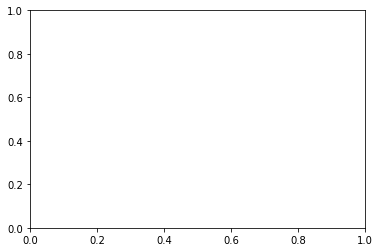

In [136]:
df['completion percentage delta'].plot.kde(cumulative=True)

In [137]:
import seaborn as sns

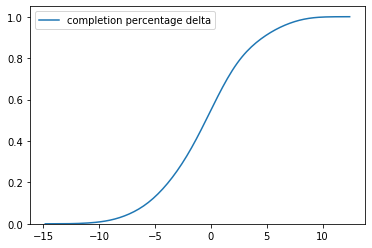

In [139]:
sns.kdeplot(df['completion percentage delta'], cumulative=True)

In [154]:
stats.norm.ppf(7, df['completion percentage delta'].mean(), df['completion percentage delta'].std())

nan

In [155]:
df['completion percentage delta'].mean()

-0.5069620253164556

In [145]:
df['completion percentage delta'].std()

3.743854702945254

In [156]:
stats.norm.ppf(7)

nan

In [168]:
stats.norm.ppf(0.4, 0, 100)

-25.334710313579972

In [175]:
(8.1 + 0.5069) / 3.74

2.3013101604278074

In [172]:
df[df['season'] == 2019].sort_values(by='completion percentage delta', ascending=False)

,team,time to throw,average completed air yards,average intended air yards,average air yards differential,aggressiveness,longest completed air distance,air yards to the sticks,attempts,yards,tds,ints,passer rating,completion percentage,expected completion percentage,completion percentage delta,name,season,standardized delta
143,TEN,2.90,7.5,9.7,-2.1,19.6,60.1,0.6,286.0,2742.0,22.0,6.0,117.5,70.3,62.2,8.1,Ryan Tannehill,2019.0,2.298957
154,NO,2.57,5.2,6.7,-1.4,13.8,42.8,-2.0,378.0,2979.0,27.0,4.0,116.3,74.3,68.0,6.3,Drew Brees,2019.0,1.818169
139,MIN,3.01,6.0,7.9,-1.9,13.1,60.5,-1.1,444.0,3603.0,26.0,6.0,107.4,69.1,63.6,5.6,Kirk Cousins,2019.0,1.631196
147,SEA,2.85,6.8,9.4,-2.6,18.6,58.1,0.2,516.0,4110.0,31.0,5.0,106.3,66.1,61.3,4.8,Russell Wilson,2019.0,1.417513
134,DET,2.69,8.3,10.7,-2.3,23.4,58.5,1.8,291.0,2499.0,19.0,5.0,106.0,64.3,60.9,3.4,Matthew Stafford,2019.0,1.043567
146,DAL,2.88,7.6,9.3,-1.7,17.8,56.2,0.4,596.0,4902.0,30.0,11.0,99.7,65.1,62.6,2.5,Dak Prescott,2019.0,0.803173
122,OAK,2.82,4.9,6.3,-1.4,11.7,47.5,-2.3,513.0,4054.0,21.0,8.0,100.8,70.4,67.9,2.4,Derek Carr,2019.0,0.776462
124,LAC,2.63,6.0,8.6,-2.6,17.1,56.5,-0.7,591.0,4615.0,23.0,20.0,88.5,66.0,64.0,1.9,Philip Rivers,2019.0,0.642910
129,SF,2.65,5.4,6.5,-1.1,15.3,57.2,-2.5,476.0,3978.0,27.0,13.0,102.0,69.1,67.5,1.7,Jimmy Garoppolo,2019.0,0.589489
137,HOU,2.82,6.5,8.7,-2.3,15.8,59.4,0.1,495.0,3852.0,26.0,12.0,98.0,67.3,65.9,1.4,Deshaun Watson,2019.0,0.509358


In [181]:
df.groupby(['name']).mean().sort_values(by='standardized delta', ascending=False).iloc[:10]

,time to throw,average completed air yards,average intended air yards,average air yards differential,aggressiveness,longest completed air distance,air yards to the sticks,attempts,yards,tds,ints,passer rating,completion percentage,expected completion percentage,completion percentage delta,season,standardized delta
name,,,,,,,,,,,,,,,,,
Sam Bradford,2.480000,5.000,6.800000,-1.800,19.400000,50.700,-2.000,552.000000,3870.00,20.000000,5.00,99.200000,71.600,64.800,6.800000,2016.000000,1.951722
Drew Brees,2.540000,5.525,6.925000,-1.375,15.850000,48.650,-1.775,518.750000,4129.25,29.750000,7.75,109.650000,72.700,67.425,5.325000,2017.500000,1.557743
Nick Foles,2.680000,4.600,6.700000,-2.000,14.900000,55.600,-2.500,195.000000,1413.00,7.000000,4.00,96.000000,72.300,67.400,4.900000,2018.000000,1.444223
Kirk Cousins,2.815000,6.175,8.125000,-2.000,14.125000,58.825,-0.650,548.750000,4227.75,27.000000,10.25,99.600000,67.650,63.300,4.375000,2017.500000,1.303993
Ryan Tannehill,2.716667,6.100,8.566667,-2.400,16.266667,58.100,-0.600,316.333333,2572.00,19.333333,9.00,101.233333,67.200,63.100,4.133333,2017.666667,1.239443
Russell Wilson,2.882500,7.050,9.400000,-2.350,16.725000,57.325,0.150,510.500000,3940.00,30.250000,8.50,101.300000,64.425,60.425,3.975000,2017.500000,1.197152
Cody Kessler,2.910000,5.150,7.250000,-2.150,16.350000,42.550,-1.950,163.000000,1044.50,4.000000,2.00,84.850000,65.250,61.650,3.600000,2017.000000,1.096988
Matt Ryan,2.702500,6.700,8.625000,-1.925,18.225000,56.200,-0.500,571.750000,4607.25,29.750000,10.25,102.000000,67.550,64.275,3.225000,2017.500000,0.996823
Andrew Luck,2.755000,6.900,8.250000,-1.350,18.350000,54.350,-0.650,592.000000,4416.00,35.000000,14.00,97.550000,65.400,62.450,2.950000,2017.000000,0.923370
